**DSE 201 Final Question 11 - Ryan Inghilterra**

Iris Data Set- 150 points in R^4 with three classes

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

In [1]:
import pandas as pd
from sklearn import decomposition
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris_df.columns = ['sepal_len_cm', 'sepal_wid_cm', 'petal_len_cm', 'petal_wid_cm', 'species']
iris_df.head()

,sepal_len_cm,sepal_wid_cm,petal_len_cm,petal_wid_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
train_data = iris_df.iloc[:,:-1]
train_data.head(2)

,sepal_len_cm,sepal_wid_cm,petal_len_cm,petal_wid_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


**(a) Use a PCA projection to 2-d to visualize the entire data set. You should plot different classes using different colors/shapes. Do the classes seem well-separated from each other?**

In [4]:
pca = decomposition.PCA(n_components=2)
pca.fit(train_data)
X = pca.transform(train_data)
df = pd.DataFrame(X, columns = ['PCA1', 'PCA2'])
df['species'] = iris_df['species']
df.head(2)

,PCA1,PCA2,species
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa


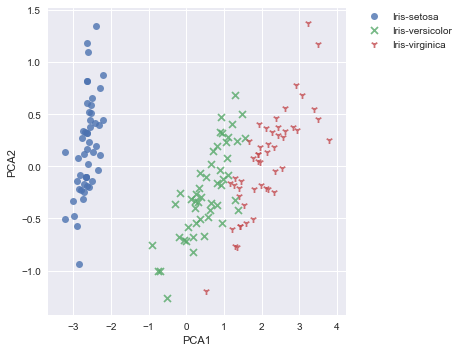

In [5]:
sns.lmplot( x="PCA1", y="PCA2", data=df, fit_reg=False, hue='species', legend=False, markers=["o", "x", "1"])
# Move the legend to an empty part
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.plt.show()

The classes have some good separation in the PCA projected 2 dimensional space

**((b) build a classifier based on a generative model for the initial data set**

split the data into training/test data, first 35 points in each class for training, and remaining 15 for testing

In [6]:
iris_seto = iris_df[iris_df['species'] == 'Iris-setosa']
iris_vers = iris_df[iris_df['species'] == 'Iris-versicolor']
iris_virg = iris_df[iris_df['species'] == 'Iris-virginica']
train_seto = iris_seto.iloc[:35,:]
train_vers = iris_vers.iloc[:35,:]
train_virg = iris_virg.iloc[:35,:]
train_set = pd.concat([train_seto, train_vers, train_virg])
#now test set last 15
test_seto = iris_seto.iloc[35:,:]
test_vers = iris_vers.iloc[35:,:]
test_virg = iris_virg.iloc[35:,:]
test_set = pd.concat([test_seto, test_vers, test_virg])

we are going to use sklearn naive_bayes GaussianNB classifier

In [7]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
iris_train = train_set[['sepal_len_cm','sepal_wid_cm','petal_len_cm','petal_wid_cm']]
train_labels = train_set['species']
gnb.fit(iris_train, train_labels)
train_set['predict_species'] = gnb.predict(iris_train)

In [8]:
num_train_mislabel = len(train_set[train_set['species'] != train_set['predict_species']])
error_rate = num_train_mislabel / float(len(train_set))
print("train error rate: {0} %".format(error_rate*100))

train error rate: 4.7619047619 %


In [12]:
iris_test = test_set[['sepal_len_cm','sepal_wid_cm','petal_len_cm','petal_wid_cm']]
test_labels = test_set['species']
test_set['predict_species'] = gnb.predict(iris_test)

In [13]:
num_test_mislabel = len(test_set[test_set['species'] != test_set['predict_species']])
error_rate = num_test_mislabel / float(len(test_set))
print("test error rate: {0} %".format(error_rate*100))

test error rate: 0.0 %


**Our test error rate was 0 %**